# Gateway Exploration

In this final segment you can take what you have learned and try it yourself. This segment is displayed in "Notebook Mode" rather than "Presentation Mode." So you will need to scroll down as you explore more content. Notebook mode will allow you to see more content at once. It also allows you to compare and contrast cells and visualizations. 

Here you are free to explore as much as you want. There are lots of suggestions in the text and in comments in the code cells. Feel free to change attributes, code pieces, etc. If a code cell breaks (e.g., you see an error), then use a search engine to look up the error to see if you can try to solve it yourself. Another way to fix problems is to compare your code to the original code, which you can see here:

https://github.com/hourofci/lessons-dev/blob/master/gateway-lesson/gateway/gateway-exploration.ipynb

Enjoy two explorations to apply what you learned at a deeper level
1. Data Wrangling - View, Clean, Extract, and Merge Data
2. Data Visualization - Making Maps

So start scrolling down. Explore and try it yourself!

In [2]:
# This code cell starts the necessary setup for Hour of CI lesson notebooks.
# First, it enables users to hide and unhide code by producing a 'Toggle raw code' button below.
# Second, it imports the hourofci package, which is necessary for lessons and interactive Jupyter Widgets.
# Third, it helps hide/control other aspects of Jupyter Notebooks to improve the user experience
# This is an initialization cell
# It is not displayed because the Slide Type is 'Skip'

from IPython.display import HTML, IFrame, Javascript, display
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout

import getpass # This library allows us to get the username (User agent string)

# import package for hourofci project
import sys
sys.path.append('../../supplementary') # relative path (may change depending on the location of the lesson notebook)
import hourofci

# Retreive the user agent string, it will be passed to the hourofci submit button
agent_js = """
IPython.notebook.kernel.execute("user_agent = " + "'" + navigator.userAgent + "'");
"""
Javascript(agent_js)

# load javascript to initialize/hide cells, get user agent string, and hide output indicator
# hide code by introducing a toggle button "Toggle raw code"
HTML(''' 
    <script type="text/javascript" src=\"../../supplementary/js/custom.js\"></script>
    
    <input id="toggle_code" type="button" value="Toggle raw code">
''')

## Setup
As always, you have to import the specific Python packages you'll need. You'll learn more about these in the other lessons, so for now let's import all of the packages that we will use for the Gateway Exploration component. If you want to dig deeper, feel free to search each package to understand what it does and what it can do for you.

As before, run this code by clicking the Run button left of the code cell. 

Wait for the code to run. This is shown by the asterisk inside the brackets of <pre>In [ ]:</pre>. When it changes to a number and the print output shows up, you're good to go. 

In [37]:
# Run this code by clicking the Run button on the left to import all of the packages

from matplotlib import pyplot
import pandas
import geopandas

import os
import pprint
import IPython
from shapely.geometry import Polygon
import numpy as np
from datetime import datetime

print("Modules imported")

/opt/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Modules imported


## Download COVID-19 Data
This optional code cell will download the US county level data released by the New York Times that we demonstrated earlier. It's found here: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv.

The code below gets the data from the URL and puts it into a local file called "us-counties.csv"

Skip this step if you already downloaded this data in an earlier segment. You can always come back and re-run it if you need to.

In [38]:
# Run this code cell if you have not yet downloaded the Covid-19 data from the New York Times
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv -O us-counties.csv

--2021-12-10 15:51:52--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83122934 (79M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]  79.27M  9.23MB/s    in 12s     

2021-12-10 15:52:07 (6.70 MB/s) - ‘us-counties.csv’ saved [83122934/83122934]



## Exploration 1: View, Clean, Extract, and Merge Data

### View the data
Once you have downloaded the data file, you should look at it to make sure it is what you want.

To do that, we'll convert the downloaded file into a format that our Python program can use. Here we're going to use the dataframe format provided by the Pandas package. 

Recall that dataframes can be though of as two dimensional arrays or spreadsheets.

In [39]:
#Read the data that we downloaded from the NYT into a dataframe
covid_counties = pandas.read_csv('./us-counties.csv')

# And let's see what it looks like!
print(covid_counties)

               date      county       state     fips  cases  deaths
0        2020-01-21   Snohomish  Washington  53061.0      1     0.0
1        2020-01-22   Snohomish  Washington  53061.0      1     0.0
2        2020-01-23   Snohomish  Washington  53061.0      1     0.0
3        2020-01-24        Cook    Illinois  17031.0      1     0.0
4        2020-01-24   Snohomish  Washington  53061.0      1     0.0
...             ...         ...         ...      ...    ...     ...
1998599  2021-12-09  Sweetwater     Wyoming  56037.0   8188   103.0
1998600  2021-12-09       Teton     Wyoming  56039.0   5436    14.0
1998601  2021-12-09       Uinta     Wyoming  56041.0   4084    31.0
1998602  2021-12-09    Washakie     Wyoming  56043.0   1859    36.0
1998603  2021-12-09      Weston     Wyoming  56045.0   1211    14.0

[1998604 rows x 6 columns]


### Clean the Data

In large data like this, there are often a few cells scattered around that may cause you problems. Cleaning data is an important and often complex step, it is one part of **data wrangling.** For now, let's just look for the most common problem - empty cells where a value is expected. These are known as null cells and if a number is expected it will show up as NaN (not a number) in your dataframe.

Let's see if we can find if we have any of these in our data. 

Since we're going to use the "fips" column to group our data, we need to know that there no null cells in that column. (The "FIPS" code is a unique identifier for geographic places. Google it if you want to know more!)

In [40]:
#Are there NaN cells in the fips column?

covid_counties['fips'].isnull().values.any()

True

In [41]:
#How many null cells are in the fips column?

count_nan = covid_counties['fips'].isnull().sum()
print ('Count of rows with null fips codes: ' + str(count_nan))

Count of rows with null fips codes: 18359


Ah ha, we found lots of problems in our data! 

Let's see what these rows containing null cells look like. Here we'll make a temporary dataframe that contains the rows with null fips codes. 

In [42]:
covid_counties_clean = covid_counties[covid_counties['fips'].notnull()]

print(covid_counties_clean)

               date      county       state     fips  cases  deaths
0        2020-01-21   Snohomish  Washington  53061.0      1     0.0
1        2020-01-22   Snohomish  Washington  53061.0      1     0.0
2        2020-01-23   Snohomish  Washington  53061.0      1     0.0
3        2020-01-24        Cook    Illinois  17031.0      1     0.0
4        2020-01-24   Snohomish  Washington  53061.0      1     0.0
...             ...         ...         ...      ...    ...     ...
1998599  2021-12-09  Sweetwater     Wyoming  56037.0   8188   103.0
1998600  2021-12-09       Teton     Wyoming  56039.0   5436    14.0
1998601  2021-12-09       Uinta     Wyoming  56041.0   4084    31.0
1998602  2021-12-09    Washakie     Wyoming  56043.0   1859    36.0
1998603  2021-12-09      Weston     Wyoming  56045.0   1211    14.0

[1980245 rows x 6 columns]


### Extract Data

Since we have a row for each day in the dataset, we will use the **groupby** function to group _daily cases_ by _county_. Since some county names are found in more than one state, we have to group by _county_ and _state_ (as well as the fips code, to be sure). We will add them all up using the **sum** function.


In [43]:
# In our earlier segment we only looked at cases. 
# What if we also wanted to look at deaths? 

# Here we replaced ['cases'] with ['cases', 'deaths'] below.
# This will group both cases and deaths by fips, county, and state values.

covid_grouped = covid_counties.groupby(['fips','county','state'])['cases', 'deaths']

# Second, add up all the Covid-19 cases using sum
covid_total = covid_grouped.sum()

#View the result, which should include the columns "fips, county, state, cases, deaths"
covid_total

/var/folders/x_/_bzgfk2n311c34x9cndz58980000gn/T/ipykernel_16612/2304553569.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_grouped = covid_counties.groupby(['fips','county','state'])['cases', 'deaths']


,,,cases,deaths
fips,county,state,,
1001.0,Autauga,Alabama,3006604,43966.0
1003.0,Baldwin,Alabama,10026906,135788.0
1005.0,Barbour,Alabama,1076374,22590.0
1007.0,Bibb,Alabama,1195647,25944.0
1009.0,Blount,Alabama,2959095,52023.0
...,...,...,...,...
72151.0,Yabucoa,Puerto Rico,522973,0.0
72153.0,Yauco,Puerto Rico,508737,0.0
78010.0,St. Croix,Virgin Islands,719140,6364.0


Now we could apply some basic arithmetic for the rows using Pandas.

Let's get the number of deaths per case for each county. This is called the Case Fatality Rather (CFR). We multiply by 100.0 to get the percentage at the end.

Before you run the code, make sure you understand that we are dividing deaths by cases for each row.

In [44]:
covid_total['deathpercase']=covid_total['deaths']/covid_total['cases']*100.0

# Print out the new 'covid_total' dataframe with a new 'deathpercase' column
covid_total

,,,cases,deaths,deathpercase
fips,county,state,,,
1001.0,Autauga,Alabama,3006604,43966.0,1.462314
1003.0,Baldwin,Alabama,10026906,135788.0,1.354236
1005.0,Barbour,Alabama,1076374,22590.0,2.098713
1007.0,Bibb,Alabama,1195647,25944.0,2.169871
1009.0,Blount,Alabama,2959095,52023.0,1.758071
...,...,...,...,...,...
72151.0,Yabucoa,Puerto Rico,522973,0.0,0.000000
72153.0,Yauco,Puerto Rico,508737,0.0,0.000000
78010.0,St. Croix,Virgin Islands,719140,6364.0,0.884946


Now that we have our data we can try some basic visualizations. Let's try making a scatter plot of cases on the x-axis and deaths on the y-axis.

<AxesSubplot:xlabel='cases', ylabel='deaths'>

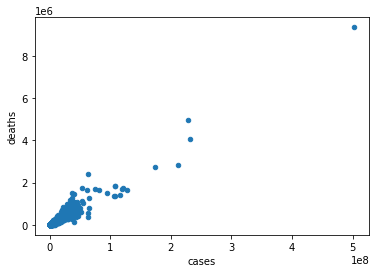

In [45]:
covid_total.plot.scatter(x='cases', y='deaths')

Here are a few things you can try adding to the scatter function as parameters (remember to use commas to separate each of them).

```python
# Change the size of the dots
# s=covid_total['deathpercase']
# s=covid_total['deathpercase']*2
```

And, try a hex-bin plot.

<AxesSubplot:xlabel='cases', ylabel='deaths'>

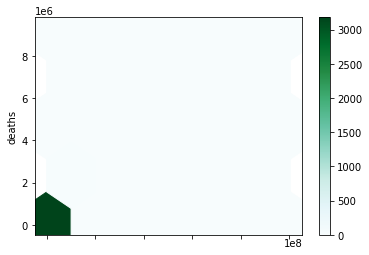

In [46]:
covid_total.plot.hexbin(x='cases', y='deaths', gridsize=5)

### Merge data 
Now we'll load "supplementary/counties_geometry.geojson" into a geodataframe. You loaded this same file in an earlier segment on mapping Covid-19. We will (again) use **merge** to merge these two datasets into a **merged** geodataframe.

In [47]:
counties_geojson = geopandas.read_file("./supplementary/counties_geometry.geojson")

# Merge geography (counties_geojson) and covid cases and deaths (covid_total)
merged = pandas.merge(counties_geojson, covid_total, how='left',
                left_on=['NAME','state_name'], right_on = ['county','state'])

# Let's take a quick look at our new merged geodataframe
merged

,NAME,state_name,GEOID,population,geometry,cases,deaths,deathpercase
0,Bladen,North Carolina,37017,33778,"MULTIPOLYGON (((-78.90200 34.83527, -78.79960 ...",1504890.0,22424.0,1.490076
1,Stanly,North Carolina,37167,61114,"MULTIPOLYGON (((-80.49738 35.20210, -80.29542 ...",3298560.0,56807.0,1.722176
2,Summit,Ohio,39153,541810,"MULTIPOLYGON (((-81.68699 41.13596, -81.68495 ...",18566712.0,396730.0,2.136781
3,Sullivan,Pennsylvania,42113,6177,"MULTIPOLYGON (((-76.81373 41.59003, -76.22014 ...",154124.0,6767.0,4.390621
4,Upshur,Texas,48459,40769,"MULTIPOLYGON (((-95.15274 32.66095, -95.15211 ...",1455872.0,31397.0,2.156577
...,...,...,...,...,...,...,...,...
3212,Seward,Nebraska,31159,17127,"MULTIPOLYGON (((-97.36812 41.04695, -96.91094 ...",797567.0,12036.0,1.509090
3213,Burke,North Carolina,37023,89712,"MULTIPOLYGON (((-81.90665 35.88338, -81.94319 ...",4371321.0,65095.0,1.489138
3214,Sumter,Georgia,13261,30352,"MULTIPOLYGON (((-84.43301 32.04196, -84.43121 ...",1248953.0,51056.0,4.087904
3215,Kansas City,Missouri,00000,491918,"POLYGON ((-94.44849 38.93168, -94.44869 38.928...",NaN,NaN,NaN


## 2. More Mapping

Now that we have a merged dataset. We can try to create a few different maps. In this Exploration you can try to improve your first map.

Here is the code from your first map. Run this code and then scroll down.

Text(0.5, 1.0, 'Number of Confirmed Cases')

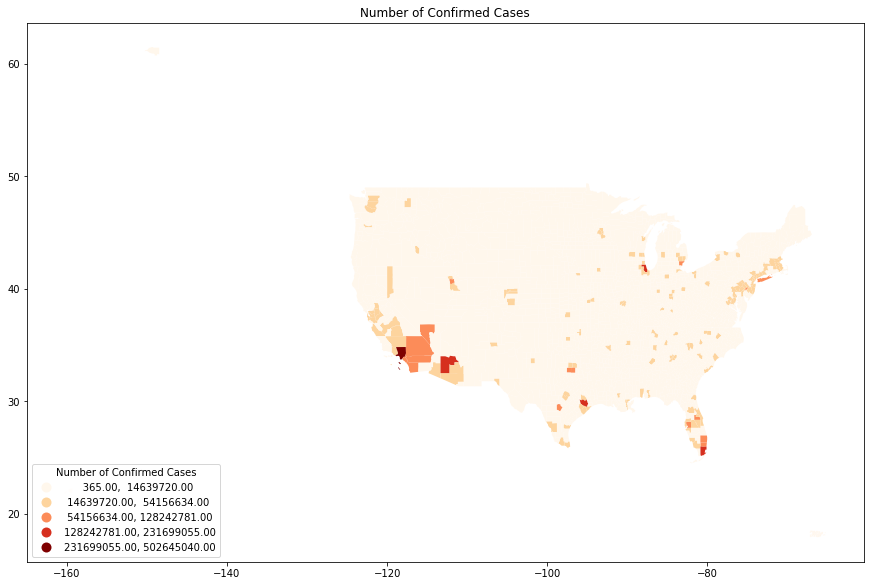

In [48]:
merged.plot(figsize=(15, 15), column='cases', cmap='OrRd', scheme='fisher_jenks', legend="true", 
                       legend_kwds={'loc': 'lower left', 'title':'Number of Confirmed Cases'})
pyplot.title("Number of Confirmed Cases")

Below is that code chunk again. Now you can try changing the code to improve the look of your map. There are a lot of options to change. 

<u>If you break something, then just copy and paste the original code above to "reset".</u>

- *column* represents the column that is being mapped. Change what you are mapping by replacing 'cases' with 'deaths' or 'deathpercase'

- *cmap* represents the colormap. You can try any number of these by replacing 'OrRd' with: 'Purples' or 'Greens' or 'gist_gray'. There are lot of choices that you can see here: https://matplotlib.org/tutorials/colors/colormaps.html. If you want to learn more about color schemes check out: https://colorbrewer2.org

- *scheme* represents the scheme for creating classes. Try a few other options by replacing 'fisher_jenks' with: 'natural_breaks' or 'quantiles'

- *loc* represents the location of your legend. Move your legend by replacing 'lower left' with 'upper right' or 'upper left'

- *title* represents the text in the legend box. If you changed the column that you are mapping, make sure to change the title too.

Want to try more? Check out here for even more options
https://geopandas.org/mapping.html#choropleth-maps

Text(0.5, 1.0, 'Number of Confirmed Cases')

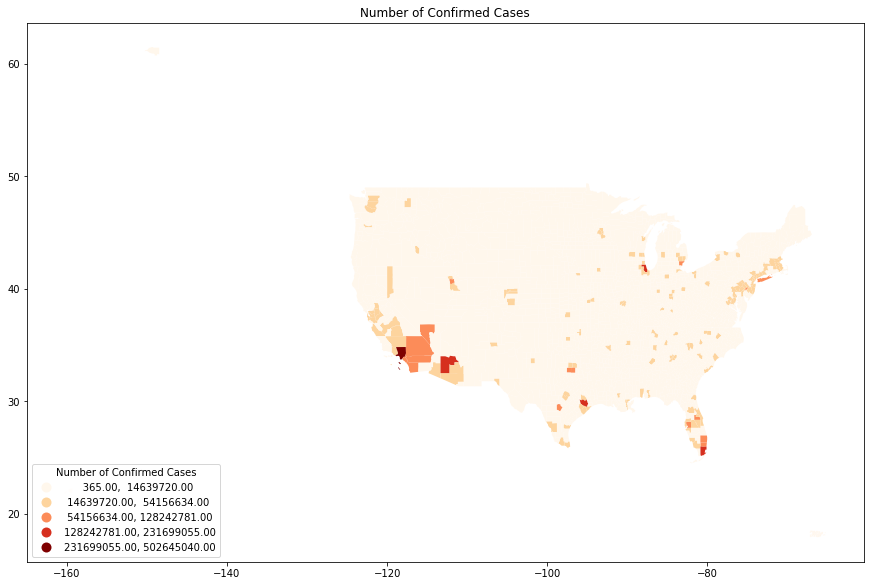

In [49]:
merged.plot(figsize=(15, 15), column='cases', cmap='OrRd', scheme='fisher_jenks', legend="true", 
                       legend_kwds={'loc': 'lower left', 'title':'Number of Confirmed Cases'})
pyplot.title("Number of Confirmed Cases")

# Congratulations!


**You have finished an Hour of CI!**


But, before you go ... 

1. Please fill out a very brief questionnaire to provide feedback and help us improve the Hour of CI lessons. It is fast and your feedback is very important to let us know what you learned and how we can improve the lessons in the future.
2. If you would like a certificate, then please type your name below and click "Create Certificate" and you will be presented with a PDF certificate.

<font size="+1"><a style="background-color:blue;color:white;padding:12px;margin:10px;font-weight:bold;" href="https://forms.gle/JUUBm76rLB8iYppN7">Take the questionnaire and provide feedback</a></font>


In [5]:
# This code cell has a tag "Hide" (Setting by going to Toolbar > View > Cell Toolbar > Tags)
# Code input is hidden when the notebook is loaded and can be hide/show using the toggle button "Toggle raw code" at the top

# This code cell loads the Interact Textbox that will ask users for their name
# Once they click "Create Certificate" then it will add their name to the certificate template
# And present them a PDF certificate
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from ipywidgets import interact

def make_cert(learner_name):
    cert_filename = 'hourofci_certificate.pdf'

    img = Image.open("../../supplementary/hci-certificate-template.jpg")
    
    draw = ImageDraw.Draw(img)
    
    cert_font = ImageFont.load_default()
    print('here')
    times = '../../supplementary/TIMES.ttf' #This is hardcoded, needs to change to actual file
    cert_font = ImageFont.truetype(times, 150) 
#     cert_font = ImageFont.truetype('times.ttf', 150) 

    w,h = cert_font.getsize(learner_name)    
    draw.text( xy = (1650-w/2,1100-h/2), text = learner_name, fill=(0,0,0),font=cert_font)
    img.save('hourofci_certificate.jpg')
    img.save('hourofci_certificate.pdf')
#     img.save(cert_filename, "PDF", resolution=100.0)   
    return cert_filename


interact_cert=interact.options(manual=True, manual_name="Create Certificate")

@interact_cert(name="Your Name")
def f(name):
    print("Congratulations",name)
    filename = make_cert(name)
    print("Download your certificate by clicking the link below.")
    
    


interactive(children=(Text(value='Your Name', description='name'), Button(description='Create Certificate', st…

<font size="+1"><a style="background-color:blue;color:white;padding:12px;margin:10px;font-weight:bold;" href="hourofci_certificate.pdf">Download your certificate PDF</a></font>

<font size="+1"><a style="background-color:blue;color:white;padding:12px;margin:10px;font-weight:bold;" href="hourofci_certificate.jpg">Download your certificate JPG</a></font>